In [50]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_seq_items = 2000

# load python modules
%load_ext autoreload
%autoreload 2
SRC_PATH = '/Users/tabea/Documents/UrbanMobility/src'
import sys
sys.path.append(SRC_PATH)
from models_ml_dl import deep_learning_model as dl_models
from models_ml_dl import tree_models as tree_models
from visualization import model_evaluation as eval
from visualization import model_interpretation_vis as model_interpret


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Interpretability: Tree-based Models

### 1.0 Data & Model Loading: Tree-based Models

In [134]:
journey_daily_16 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2016.csv', parse_dates=['start_date'], index_col=0)
journey_daily_17 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2017.csv', parse_dates=['start_date'], index_col=0)
journey_daily_18 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2018.csv', parse_dates=['start_date'], index_col=0)
journey_daily_19 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_daily_2019.csv', parse_dates=['start_date'], index_col=0)

# use 2016, 2017 and 2018 as train data and 2019 as test data
journey_daily_train = pd.concat([journey_daily_16, journey_daily_17, journey_daily_18])
journey_daily_test = journey_daily_19.copy()

# train test split
x_daily_train, y_daily_train, x_daily_test, y_daily_test = tree_models.train_test_split(journey_daily_train, journey_daily_test)

In [135]:
#load model
rf_daily = joblib.load('../models/random_forest_daily.pkl')
gb_daily = joblib.load('../models/gradient_boosting_daily.pkl')

#pred
feature_cols_daily = x_daily_train.columns.drop(['start_date', 'hour']) 
y_pred_rf = rf_daily.predict(x_daily_test[feature_cols_daily])
y_pred_gb = gb_daily.predict(x_daily_test[feature_cols_daily])

In [136]:
boroughs = ['Westminster', 'Tower Hamlets', 'Kensington and Chelsea', 'Camden', 
            'Hammersmith and Fulham', 'Lambeth', 'Wandsworth', 'Southwark', 
            'Hackney', 'City of London', 'Islington', 'Newham']

### 1.1 Impurity Feature Importance

#### 1.1.1 Brokendown into categories

<Figure size 72x504 with 0 Axes>

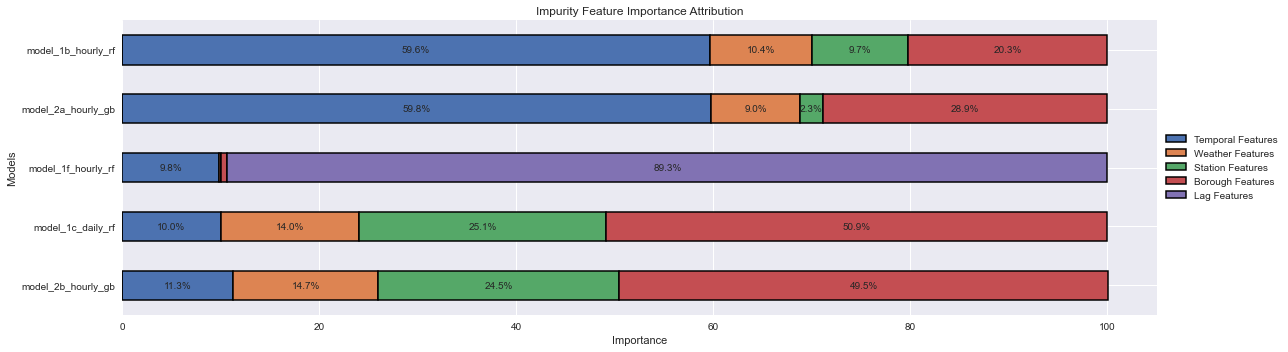

In [93]:
data = {'Features': ['Temporal Features', 'Weather Features', 'Station Features', 'Borough Features', 'Lag Features'],
        'model_2b_hourly_gb': [11.28, 14.72, 24.47, 49.54, 0],
        'model_1c_daily_rf': [10.0, 14.05, 25.06, 50.88, 0],
        'model_1f_hourly_rf': [9.81, 0.18, 0.08, 0.59, 89.34],
        'model_2a_hourly_gb': [59.79, 8.99, 2.34, 28.88, 0],
        'model_1b_hourly_rf': [59.63, 10.36, 9.72, 20.29, 0]
        }
df_features_cat = pd.DataFrame(data)

model_interpret.feature_importance_stacked_barplot(df_features_cat)

#### 1.1.2 Top Features

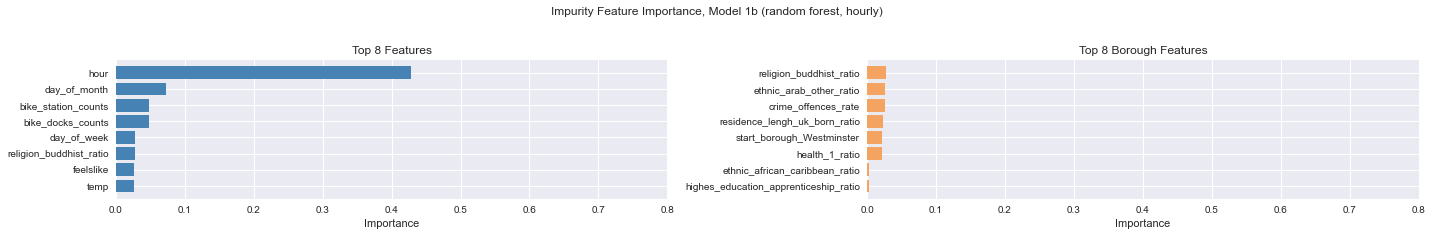

In [168]:
# 1b: copy paste impurity from notebook 6

impurity_1b = {
    "Feature": ["hour", "day_of_month", "bike_station_counts", "bike_docks_counts", "day_of_week", "religion_buddhist_ratio", "feelslike", "temp", "ethnic_arab_other_ratio", "crime_offences_rate", "residence_lengh_uk_born_ratio", "part_of_day", "start_borough_Westminster", "health_1_ratio", "is_weekend", "day_of_year", "humidity", "cloudcover", "windspeed", "visibility", "dew", "bank_holiday", "ethnic_african_caribbean_ratio", "uvindex", "highes_education_apprenticeship_ratio", "ethnic_mixed_ratio", "distance_work_no_fix_place_ratio", "residence_lengh_10yr_less_ratio", "season", "distance_work_less_2km_ratio", "business_density", "election_seats_percentage_gre", "personal_wellbeing_anxiety", "personal_wellbeing_happiness", "ethnic_asian_ratio", "blue_cover_ratio", "month", "age_25_percentile", "health_4_ratio", "occupation_lower_level_ratio_ratio", "personal_wellbeing_life_satisfaction", "religion_sikh_ratio", "highes_education_l1_ratio", "religion_muslim_ratio","distance_work_5km_10km_ratio", "accommodation_house_ratio", "health_5_ratio","householdsize_2_ratio", "occupation_small_intermediate_ratio_ratio","accommodation_flat_ratio", "highes_education_l2_ratio", "ethnic_white_ratio","religion_no_ratio", "householdsize_3-5_ratio", "distance_work_20km_more_ratio","occupation_high_level_ratio_ratio", "distance_work_homeoffice_ratio", "householdsize_6+_ratio", "highes_education_l4_ratio", "start_borough_Lambeth", "occupation_student_ratio_ratio", "distance_work_2km_5km_ratio", "health_3_ratio","religion_hindu_ratio", "windgust", "householdsize_1_ratio", "age_mean", "occupation_unemployed_ratio_ratio", "distance_work_10km_20km_ratio", "residence_lengh_10yr_plus_ratio", "street_health_score", "religion_jewish_ratio", "election_seats_percentage_lab", "highes_education_no_ratio", "highes_education_l3_ratio", "house_price_avg", "disability_ratio", "health_2_ratio", "population_density", "earnings_workplace", "precip", "green_cover_ratio", "accommodation_mobile_ratio", "election_seats_percentage_ld", "election_seats_percentage_con", "road_traffic_ratio", "personal_wellbeing_worthwhile", "female_ratio", "age_75_percentile", "car_household_ratio", "sports_participation_ratio", "start_borough_City of London","tenure_owned_sharedowned_ratio", "start_borough_Newham", "religion_christian_ratio", "start_borough_Camden", "start_borough_Kensington and Chelsea", "start_borough_Tower Hamlets", "election_seats_percentage_ind", "start_borough_Southwark", "start_borough_Wandsworth", "start_borough_Islington", "start_borough_Hammersmith and Fulham", "start_borough_Hackney"],
    "Importance": [0.42856, 0.07207, 0.04878, 0.04843, 0.02788, 0.02768, 0.02704, 0.02631, 0.02618, 0.02612, 0.02359, 0.02340, 0.02146, 0.02133, 0.02089, 0.01633, 0.01552, 0.00857, 0.00807, 0.00744, 0.00642, 0.00458, 0.00313, 0.00310, 0.00204, 0.00192, 0.00186, 0.00161, 0.00153, 0.00141, 0.00138, 0.00125, 0.00124, 0.00123, 0.00120, 0.00110, 0.00107, 0.00106, 0.00106, 0.00106, 0.00105, 0.00105, 0.00104, 0.00098, 0.00094, 0.00091, 0.00089, 0.00087, 0.00087, 0.00087, 0.00085, 0.00085, 0.00084, 0.00083, 0.00083, 0.00081, 0.00080, 0.00080, 0.00078, 0.00077, 0.00076, 0.00075, 0.00073, 0.00073, 0.00072, 0.00071, 0.00071, 0.00070, 0.00068, 0.00061, 0.00061, 0.00061, 0.00060, 0.00060, 0.00057, 0.00053, 0.00049, 0.00049, 0.00047, 0.00047, 0.00044, 0.00042, 0.00041, 0.00041, 0.00039, 0.00038, 0.00038, 0.00032, 0.00032, 0.00029, 0.00025, 0.00018, 0.00018, 0.00014, 0.00014, 0.00014, 0.00006, 0.00003, 0.00003, 0.00001, 0.00001, 0.00000, 0.00000, 0.00000]
}

df_impurity_1b = pd.DataFrame(impurity_1b)
model_interpret.top_8_features_plot(df_impurity_1b, '1b (random forest, hourly)')

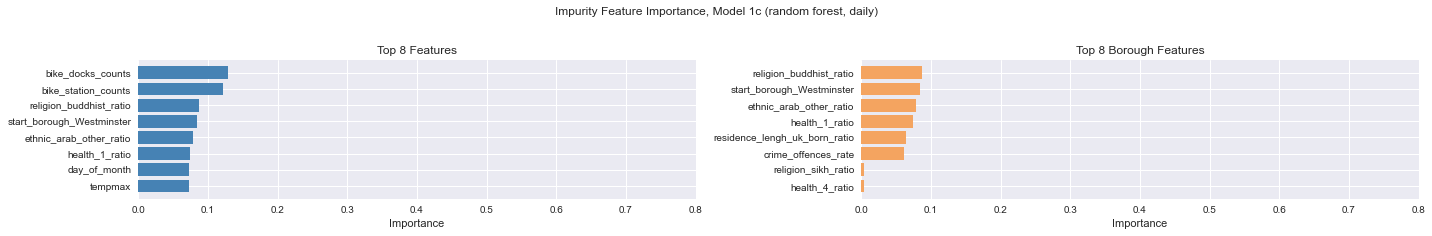

In [169]:
# 1c: copy paste impurity from notebook 6

impurity_1c = {
    'Feature': ['bike_docks_counts', 'bike_station_counts', 'religion_buddhist_ratio', 'start_borough_Westminster', 'ethnic_arab_other_ratio', 'health_1_ratio', 'day_of_month', 'tempmax', 'residence_lengh_uk_born_ratio', 'crime_offences_rate', 'precip', 'humidity', 'day_of_week', 'is_weekend', 'day_of_year', 'uvindex', 'daylight_hours', 'cloudcover', 'temp', 'feelslike', 'windspeed', 'visibility', 'religion_sikh_ratio', 'health_4_ratio', 'religion_muslim_ratio', 'tempmin', 'female_ratio', 'occupation_high_level_ratio_ratio', 'distance_work_20km_more_ratio', 'windgust', 'start_borough_Newham', 'residence_lengh_10yr_plus_ratio', 'householdsize_1_ratio', 'householdsize_6+_ratio', 'blue_cover_ratio', 'occupation_student_ratio_ratio', 'distance_work_no_fix_place_ratio', 'occupation_unemployed_ratio_ratio', 'religion_jewish_ratio', 'highes_education_apprenticeship_ratio', 'highes_education_l1_ratio', 'ethnic_asian_ratio', 'age_mean', 'highes_education_l4_ratio', 'religion_no_ratio', 'health_5_ratio', 'age_25_percentile', 'distance_work_homeoffice_ratio', 'accommodation_flat_ratio', 'election_seats_percentage_lab', 'occupation_lower_level_ratio_ratio', 'sports_participation_ratio', 'ethnic_mixed_ratio', 'health_3_ratio', 'ethnic_white_ratio', 'accommodation_mobile_ratio', 'occupation_small_intermediate_ratio_ratio', 'distance_work_10km_20km_ratio', 'householdsize_3-5_ratio', 'season', 'highes_education_l2_ratio', 'highes_education_no_ratio', 'religion_hindu_ratio', 'street_health_score', 'house_price_avg', 'bank_holiday', 'householdsize_2_ratio', 'accommodation_house_ratio', 'month', 'distance_work_2km_5km_ratio', 'disability_ratio', 'road_traffic_ratio', 'highes_education_l3_ratio', 'ethnic_african_caribbean_ratio', 'green_cover_ratio', 'health_2_ratio', 'population_density', 'residence_lengh_10yr_less_ratio', 'election_seats_percentage_ld', 'business_density', 'election_seats_percentage_gre', 'start_borough_Camden', 'earnings_workplace', 'personal_wellbeing_worthwhile', 'election_seats_percentage_con', 'personal_wellbeing_anxiety', 'tenure_owned_sharedowned_ratio', 'personal_wellbeing_happiness', 'religion_christian_ratio', 'car_household_ratio', 'distance_work_5km_10km_ratio', 'part_of_day', 'personal_wellbeing_life_satisfaction', 'age_75_percentile', 'distance_work_less_2km_ratio', 'start_borough_Southwark', 'start_borough_Islington', 'election_seats_percentage_ind', 'start_borough_Hammersmith and Fulham', 'start_borough_City of London', 'start_borough_Kensington and Chelsea', 'start_borough_Lambeth', 'start_borough_Wandsworth', 'start_borough_Tower Hamlets', 'start_borough_Hackney'],
    'Importance': [0.12879, 0.12185, 0.08779, 0.08416, 0.07846, 0.07488, 0.07269, 0.07248, 0.06375, 0.06114, 0.01455, 0.01080, 0.00960, 0.00809, 0.00800, 0.00633, 0.00594, 0.00575, 0.00522, 0.00509, 0.00483, 0.00458, 0.00422, 0.00409, 0.00355, 0.00334, 0.00273, 0.00174, 0.00164, 0.00160, 0.00152, 0.00145, 0.00134, 0.00130, 0.00128, 0.00128, 0.00127, 0.00126, 0.00125, 0.00125, 0.00120, 0.00120, 0.00120, 0.00119, 0.00112, 0.00109, 0.00107, 0.00107, 0.00104, 0.00103, 0.00100, 0.00093, 0.00093, 0.00092, 0.00092, 0.00090, 0.00077, 0.00077, 0.00077, 0.00070, 0.00062, 0.00062, 0.00061, 0.00059, 0.00052, 0.00049, 0.00049, 0.00047, 0.00043, 0.00035, 0.00034, 0.00032, 0.00031, 0.00031, 0.00027, 0.00026, 0.00025, 0.00024, 0.00023, 0.00021, 0.00020, 0.00014, 0.00013, 0.00012, 0.00011, 0.00011, 0.00009, 0.00007, 0.00006, 0.00005, 0.00005, 0.00004, 0.00004, 0.00004, 0.00004, 0.00003, 0.00002, 0.00002, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00000]
}

df_impurity_1c = pd.DataFrame(impurity_1c)
model_interpret.top_8_features_plot(df_impurity_1c, '1c (random forest, daily)')

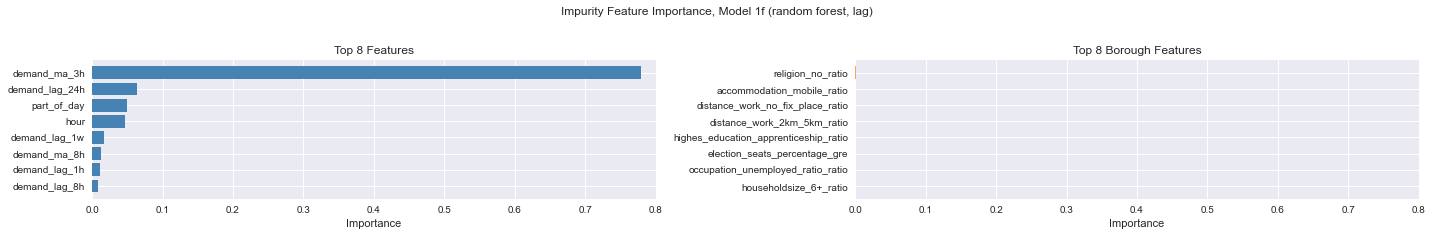

In [170]:
# 1f: copy paste impurity from notebook 6


impurity_1f = {
    'Feature': ['demand_ma_3h', 'demand_lag_24h', 
    'part_of_day', 'hour', 'demand_lag_1w', 'demand_ma_8h', 'demand_lag_1h', 'demand_lag_8h', 'demand_ma_24h', 'religion_no_ratio', 'day_of_month', 'bike_docks_counts', 'bike_station_counts', 'accommodation_mobile_ratio', 'humidity', 'distance_work_no_fix_place_ratio', 'day_of_week', 'distance_work_2km_5km_ratio', 'visibility', 'cloudcover', 'windspeed', 'highes_education_apprenticeship_ratio', 'day_of_year', 'dew', 'election_seats_percentage_gre', 'occupation_unemployed_ratio_ratio', 'householdsize_6+_ratio', 'temp', 'occupation_lower_level_ratio_ratio'],
    'Importance': [0.78011, 0.06327, 0.04967, 0.04733, 0.01665, 0.01290, 0.01145, 0.00778, 0.00125,0.00046, 0.00041, 0.00040, 0.00036, 0.00034, 0.00032, 0.00030, 0.00030, 0.00029,0.00026, 0.00026, 0.00025, 0.00024, 0.00023, 0.00022, 0.00020, 0.00020, 0.00019,0.00018, 0.00018, ]
}

df_impurity_1f = pd.DataFrame(impurity_1f)
model_interpret.top_8_features_plot(df_impurity_1f, '1f (random forest, lag)')



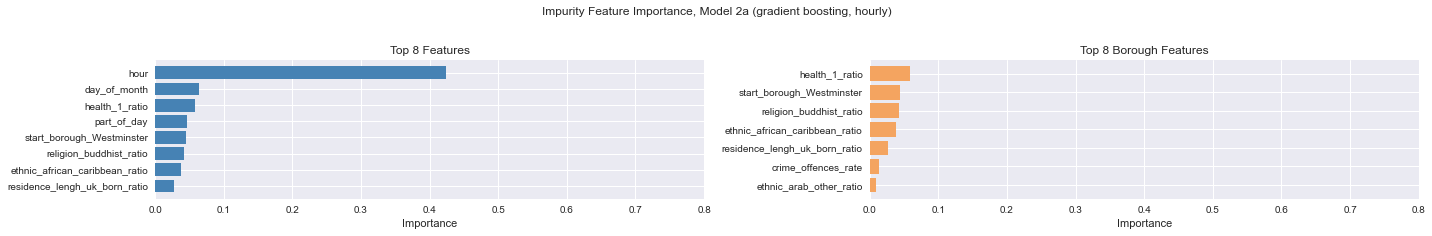

In [171]:
# 2a: copy paste impurity from notebook 6

import pandas as pd

impurity_2a = {
    'Feature': ['hour', 'day_of_month', 'health_1_ratio', 'part_of_day', 'start_borough_Westminster', 'religion_buddhist_ratio', 'ethnic_african_caribbean_ratio', 'residence_lengh_uk_born_ratio', 'day_of_week', 'humidity', 'is_weekend', 'feelslike', 'temp', 'bike_docks_counts', 'crime_offences_rate', 'day_of_year', 'ethnic_arab_other_ratio', 'uvindex', 'bike_station_counts', 'windspeed', 'bank_holiday', 'dew', 'cloudcover', 'visibility'],
    'Importance': [0.42396, 0.06333, 0.05838, 0.04700, 0.04461, 0.04240, 0.03826, 0.02696, 0.02467, 0.02306, 0.02174, 0.02114, 0.02067, 0.01826, 0.01335, 0.01148, 0.00844, 0.00617, 0.00515, 0.00459, 0.00448, 0.00448, 0.00413, 0.00412]
}

df_impurity_2a = pd.DataFrame(impurity_2a)
model_interpret.top_8_features_plot(df_impurity_2a, '2a (gradient boosting, hourly)')

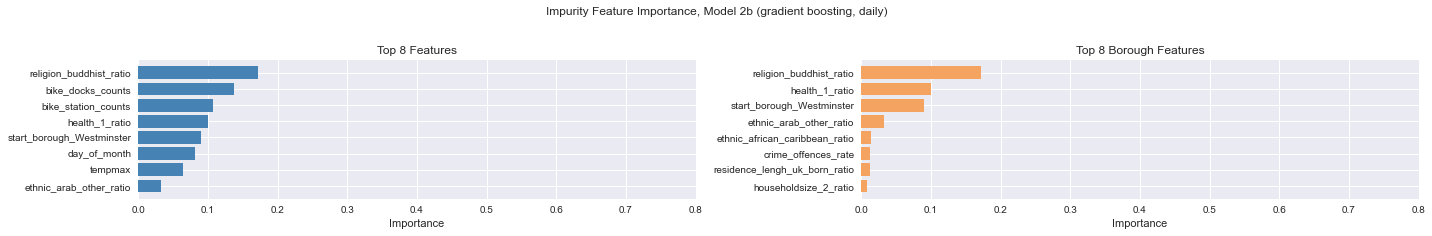

In [173]:
# 2b: copy paste impurity from notebook 6

import pandas as pd

impurity_2b = {
    'Feature': ['religion_buddhist_ratio', 'bike_docks_counts', 'bike_station_counts', 'health_1_ratio', 'start_borough_Westminster', 'day_of_month', 'tempmax', 'ethnic_arab_other_ratio', 'precip', 'ethnic_african_caribbean_ratio', 'humidity', 'crime_offences_rate', 'residence_lengh_uk_born_ratio', 'uvindex', 'day_of_week', 'day_of_year', 'is_weekend', 'cloudcover', 'daylight_hours', 'householdsize_2_ratio', 'windspeed', 'health_4_ratio', 'visibility', 'feelslike'],
    'Importance': [0.17135, 0.13737, 0.10728, 0.10064, 0.08969, 0.08145, 0.06417, 0.03312, 0.01601, 0.01409, 0.01270, 0.01264, 0.01258, 0.01062, 0.01061, 0.00975, 0.00832, 0.00827, 0.00816, 0.00806, 0.00657, 0.00626, 0.00620, 0.00513]
}

df_impurity_2b = pd.DataFrame(impurity_2b)
model_interpret.top_8_features_plot(df_impurity_2b, '2b (gradient boosting, daily)')

### 1.2 Accumulated Local Effects Plot

In [ ]:
ale_exp_rf = model_interpret.ale_explainer(rf_daily, feature_cols_daily, x_daily_test[feature_cols_daily])
ale_exp_gb = model_interpret.ale_explainer(gb_daily, feature_cols_daily, x_daily_test[feature_cols_daily])

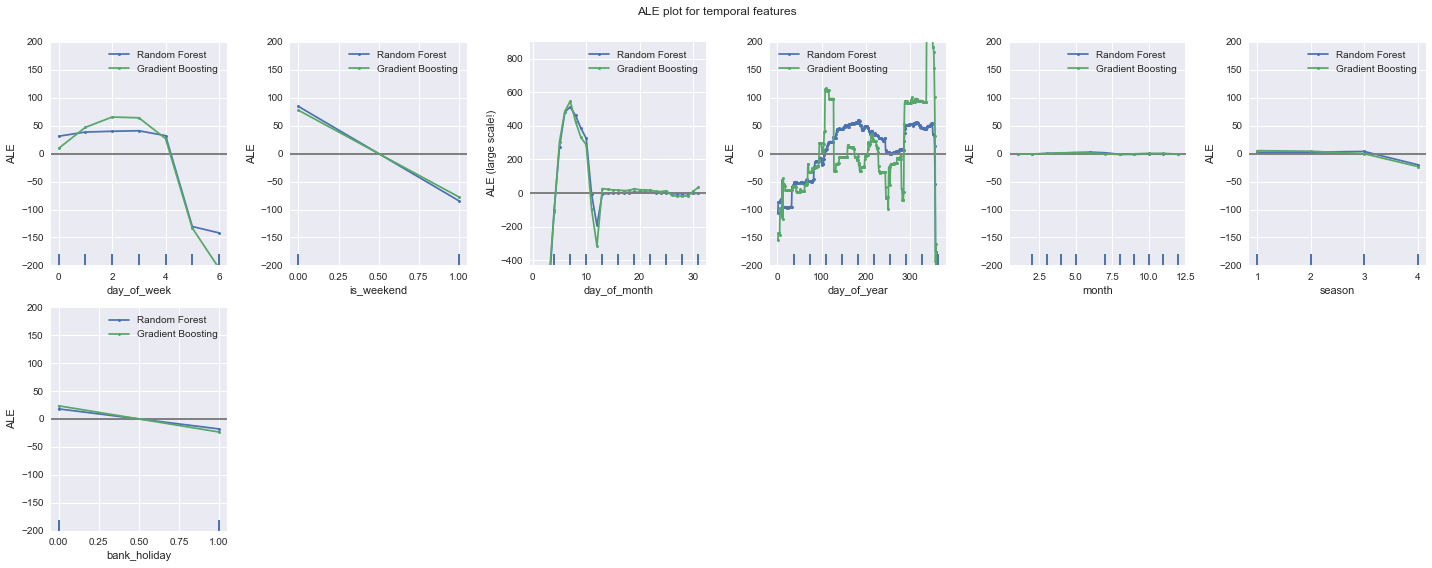

In [159]:
plt.style.use('seaborn-v0_8')

# change y-scale for features with very high demand
large_scale_index = [x_daily_test[feature_cols_daily].columns.get_loc('day_of_month')]

temporal_features = ['day_of_week', 'is_weekend', 'day_of_month', 'day_of_year', 'month', 'season', 'bank_holiday']
model_interpret.ale_plot(x_daily_test[feature_cols_daily], ale_exp_rf, ale_exp_gb, temporal_features, 8, 0.92, 'temporal features', large_scale_index)

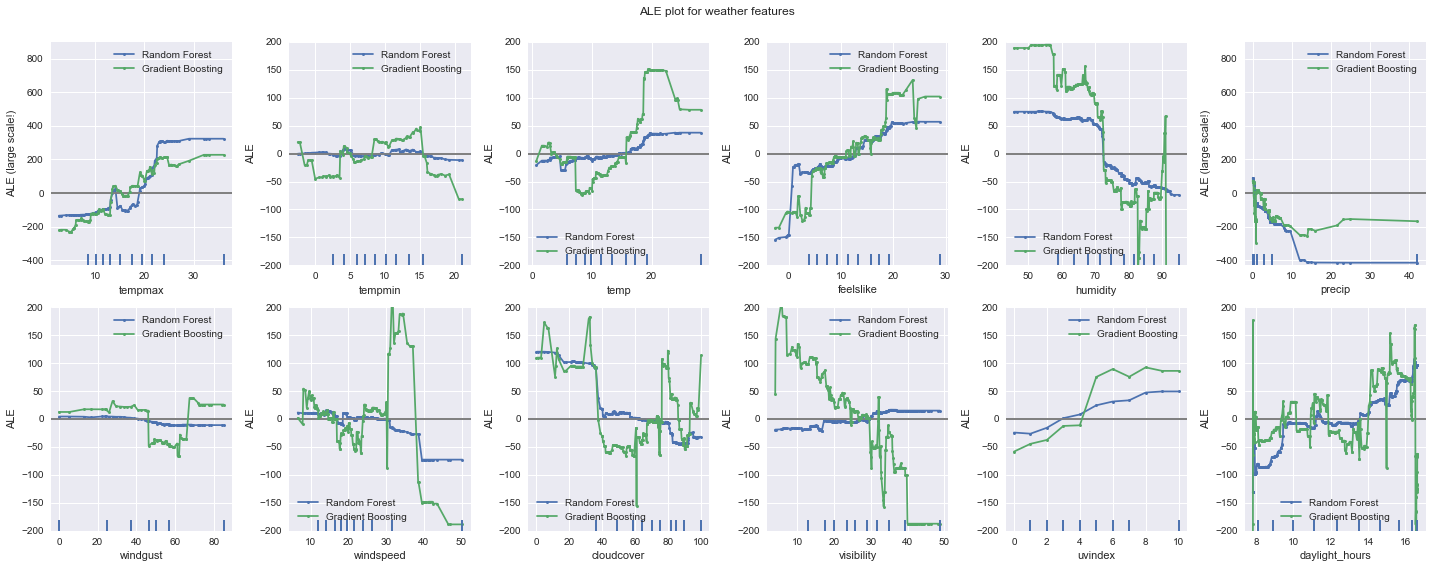

In [163]:
# change y-scale for features with very high demand
large_scale_index = [x_daily_test[feature_cols_daily].columns.get_loc('tempmax'),
                     x_daily_test[feature_cols_daily].columns.get_loc('precip')]

weather_features = ['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'precip', 'windgust', 'windspeed', 'cloudcover', 'visibility', 'uvindex', 'daylight_hours']
model_interpret.ale_plot(x_daily_test[feature_cols_daily], ale_exp_rf, ale_exp_gb, weather_features, 8, 0.92, 'weather features', large_scale_index)

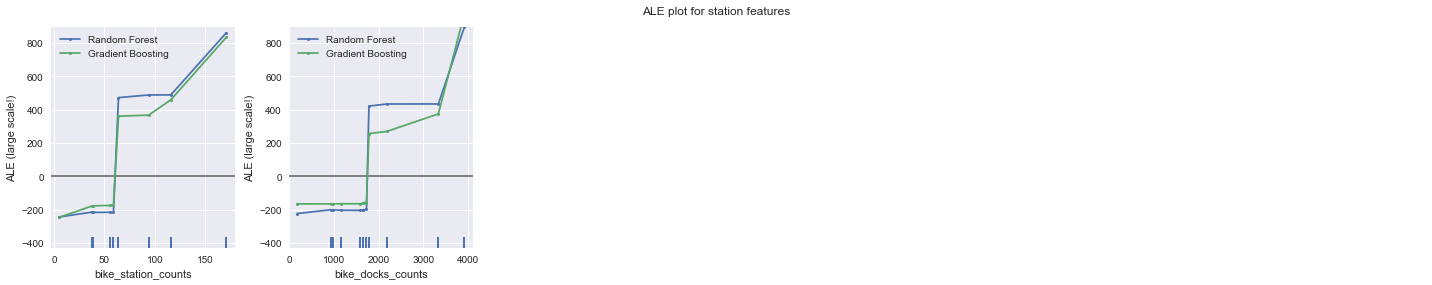

In [161]:
# change y-scale for features with very high demand
large_scale_index = [x_daily_test[feature_cols_daily].columns.get_loc('bike_station_counts'),
                     x_daily_test[feature_cols_daily].columns.get_loc('bike_docks_counts')]

station_features = ['bike_station_counts', 'bike_docks_counts']
model_interpret.ale_plot(x_daily_test[feature_cols_daily], ale_exp_rf, ale_exp_gb, station_features, 4, 0.91, 'station features', large_scale_index)

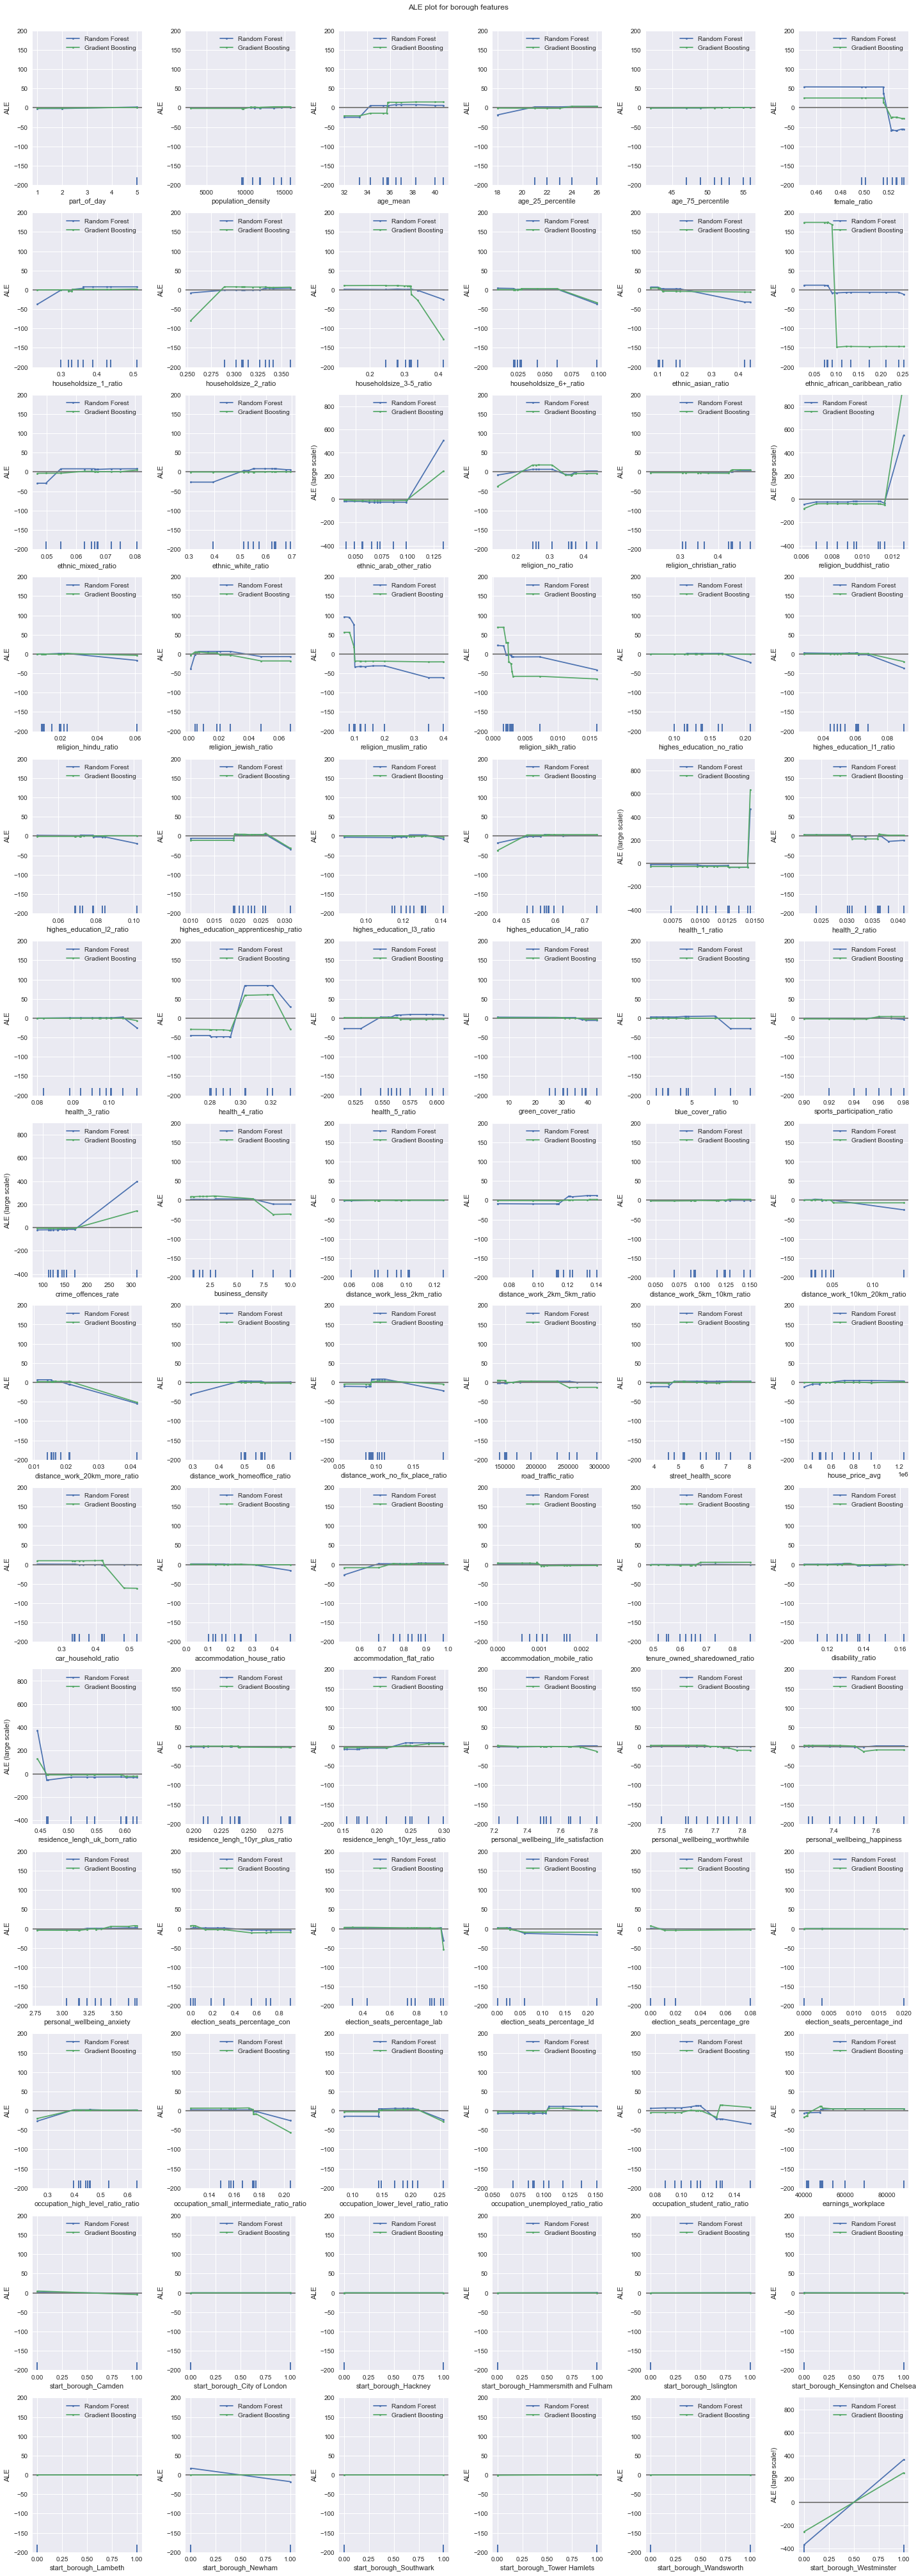

In [162]:
# change y-scale for features with very high demand
large_scale_index = [x_daily_test[feature_cols_daily].columns.get_loc('ethnic_arab_other_ratio'),
                     x_daily_test[feature_cols_daily].columns.get_loc('religion_buddhist_ratio'),
                     x_daily_test[feature_cols_daily].columns.get_loc('health_1_ratio'),
                     x_daily_test[feature_cols_daily].columns.get_loc('start_borough_Westminster'),
                     x_daily_test[feature_cols_daily].columns.get_loc('residence_lengh_uk_born_ratio'),
                     x_daily_test[feature_cols_daily].columns.get_loc('crime_offences_rate')]

borough_features = x_daily_test[feature_cols_daily].columns[~x_daily_test[feature_cols_daily].columns.isin(temporal_features) & ~x_daily_test[feature_cols_daily].columns.isin(weather_features)& ~x_daily_test[feature_cols_daily].columns.isin(station_features)]
model_interpret.ale_plot(x_daily_test[feature_cols_daily], ale_exp_rf, ale_exp_gb, borough_features, 57, 0.97, 'borough features', large_scale_index)

### 1.3 Permutation Feature Importance

#### 1.3.1 Brokendown into categories

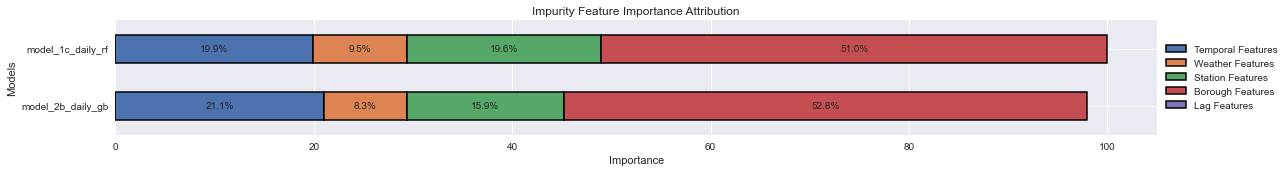

In [152]:
data = {'Features': ['Temporal Features', 'Weather Features', 'Station Features', 'Borough Features', 'Lag Features'],
        'model_2b_daily_gb': [21.05, 8.32, 15.87, 52.76, 0],
        'model_1c_daily_rf': [19.89, 9.51, 19.60, 51.00, 0]
        }

df_permutation_cat = pd.DataFrame(data)

model_interpret.feature_importance_stacked_barplot(df_permutation_cat, 2.5)

#### 1.3.2 Top Features

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


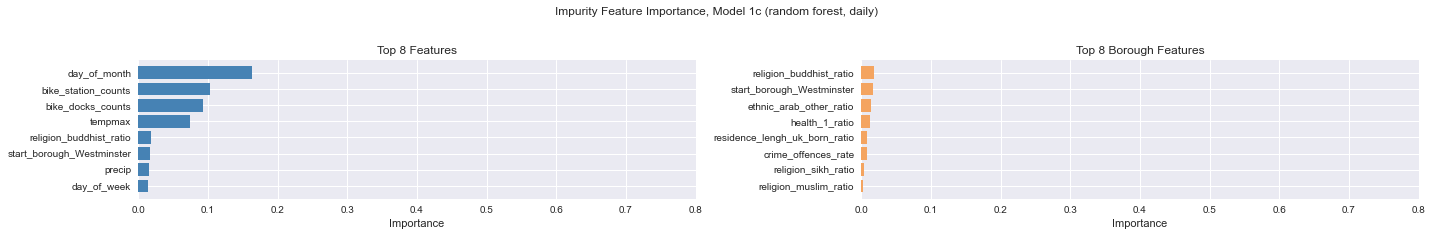

In [177]:
# model 1c

perm_feature_importances_rf = model_interpret.permutation_tree(rf_daily, x_daily_test[feature_cols_daily], y_daily_test)

# Plot most important features
df_permutation_rf = pd.DataFrame(perm_feature_importances_rf, columns=['Feature', 'Importance'])
model_interpret.top_8_features_plot(df_permutation_rf, '1c (random forest, daily)')

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


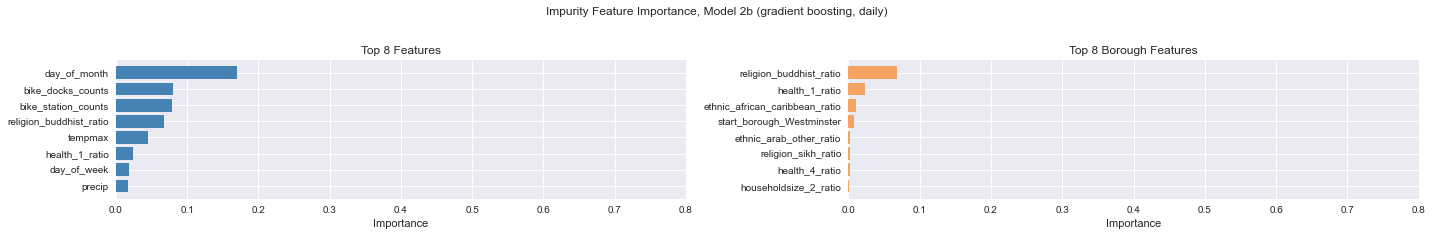

In [180]:
# model 2b

perm_feature_importances_gb = model_interpret.permutation_tree(gb_daily, x_daily_test[feature_cols_daily], y_daily_test)

df_permutation_gb = pd.DataFrame(perm_feature_importances_gb, columns=['Feature', 'Importance'])
model_interpret.top_8_features_plot(df_permutation_gb, '2b (gradient boosting, daily)')

### 1.4 Shapley Additive Explanations (SHAP)

#### 1.4.1 Random Forest

In [181]:
filename_expl = '../models/shap_explainer_rf.sav'
filename_val = '../models/shap_values_rf.sav'

shap_values_rf = model_interpret.create_shap(rf_daily, x_daily_test[feature_cols_daily], filename_expl, filename_val)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


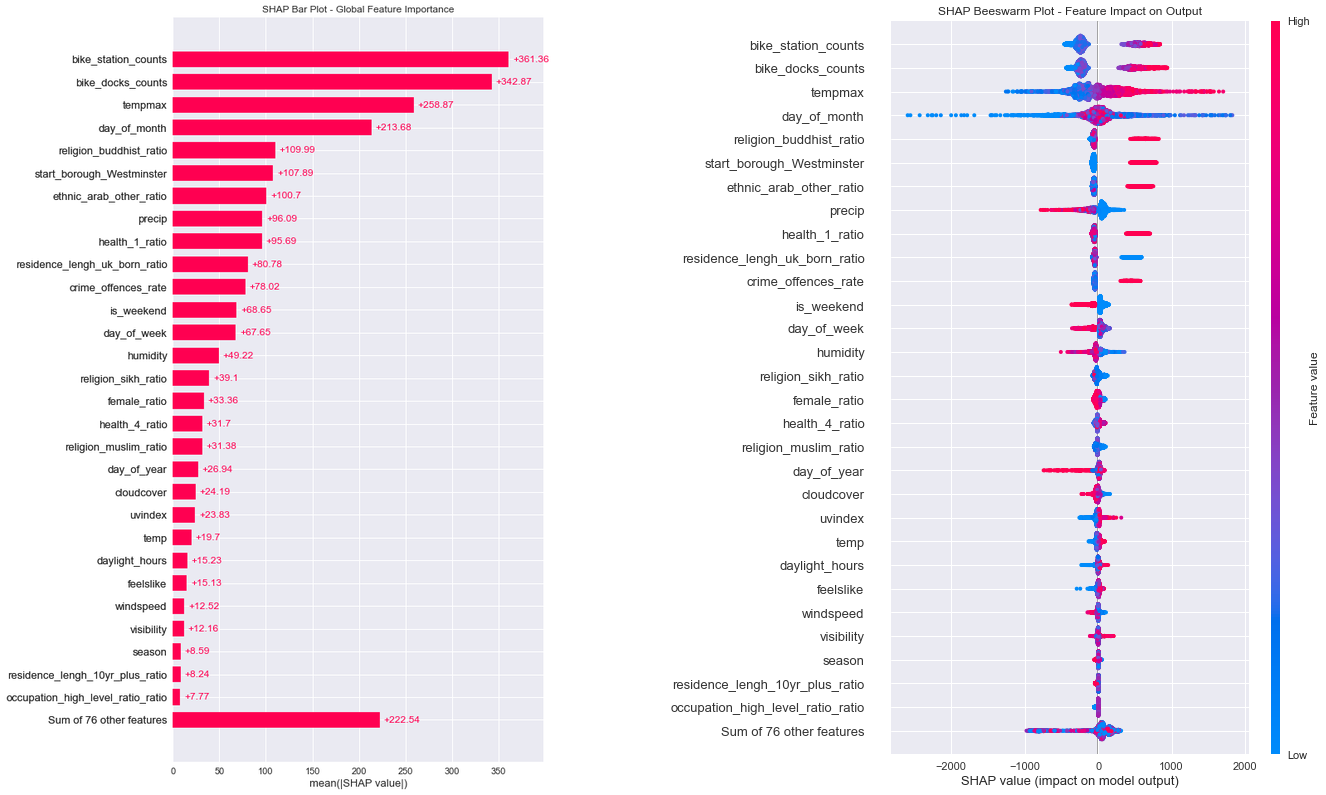

<Figure size 576x972 with 0 Axes>

In [182]:
filename_bar_plot = '../reports/figures/shap_global_plots_rf/global_bar_plot.png'
filename_beeswarm_plot = '../reports/figures/shap_global_plots_rf/global_beeswarm_plot.png'
filename_final = '../reports/figures/shap_global_plots_rf/combined_global_shap_plots.png'

model_interpret.plot_shap_bar_and_beeswarm(shap_values_rf, filename_bar_plot, filename_beeswarm_plot, filename_final)

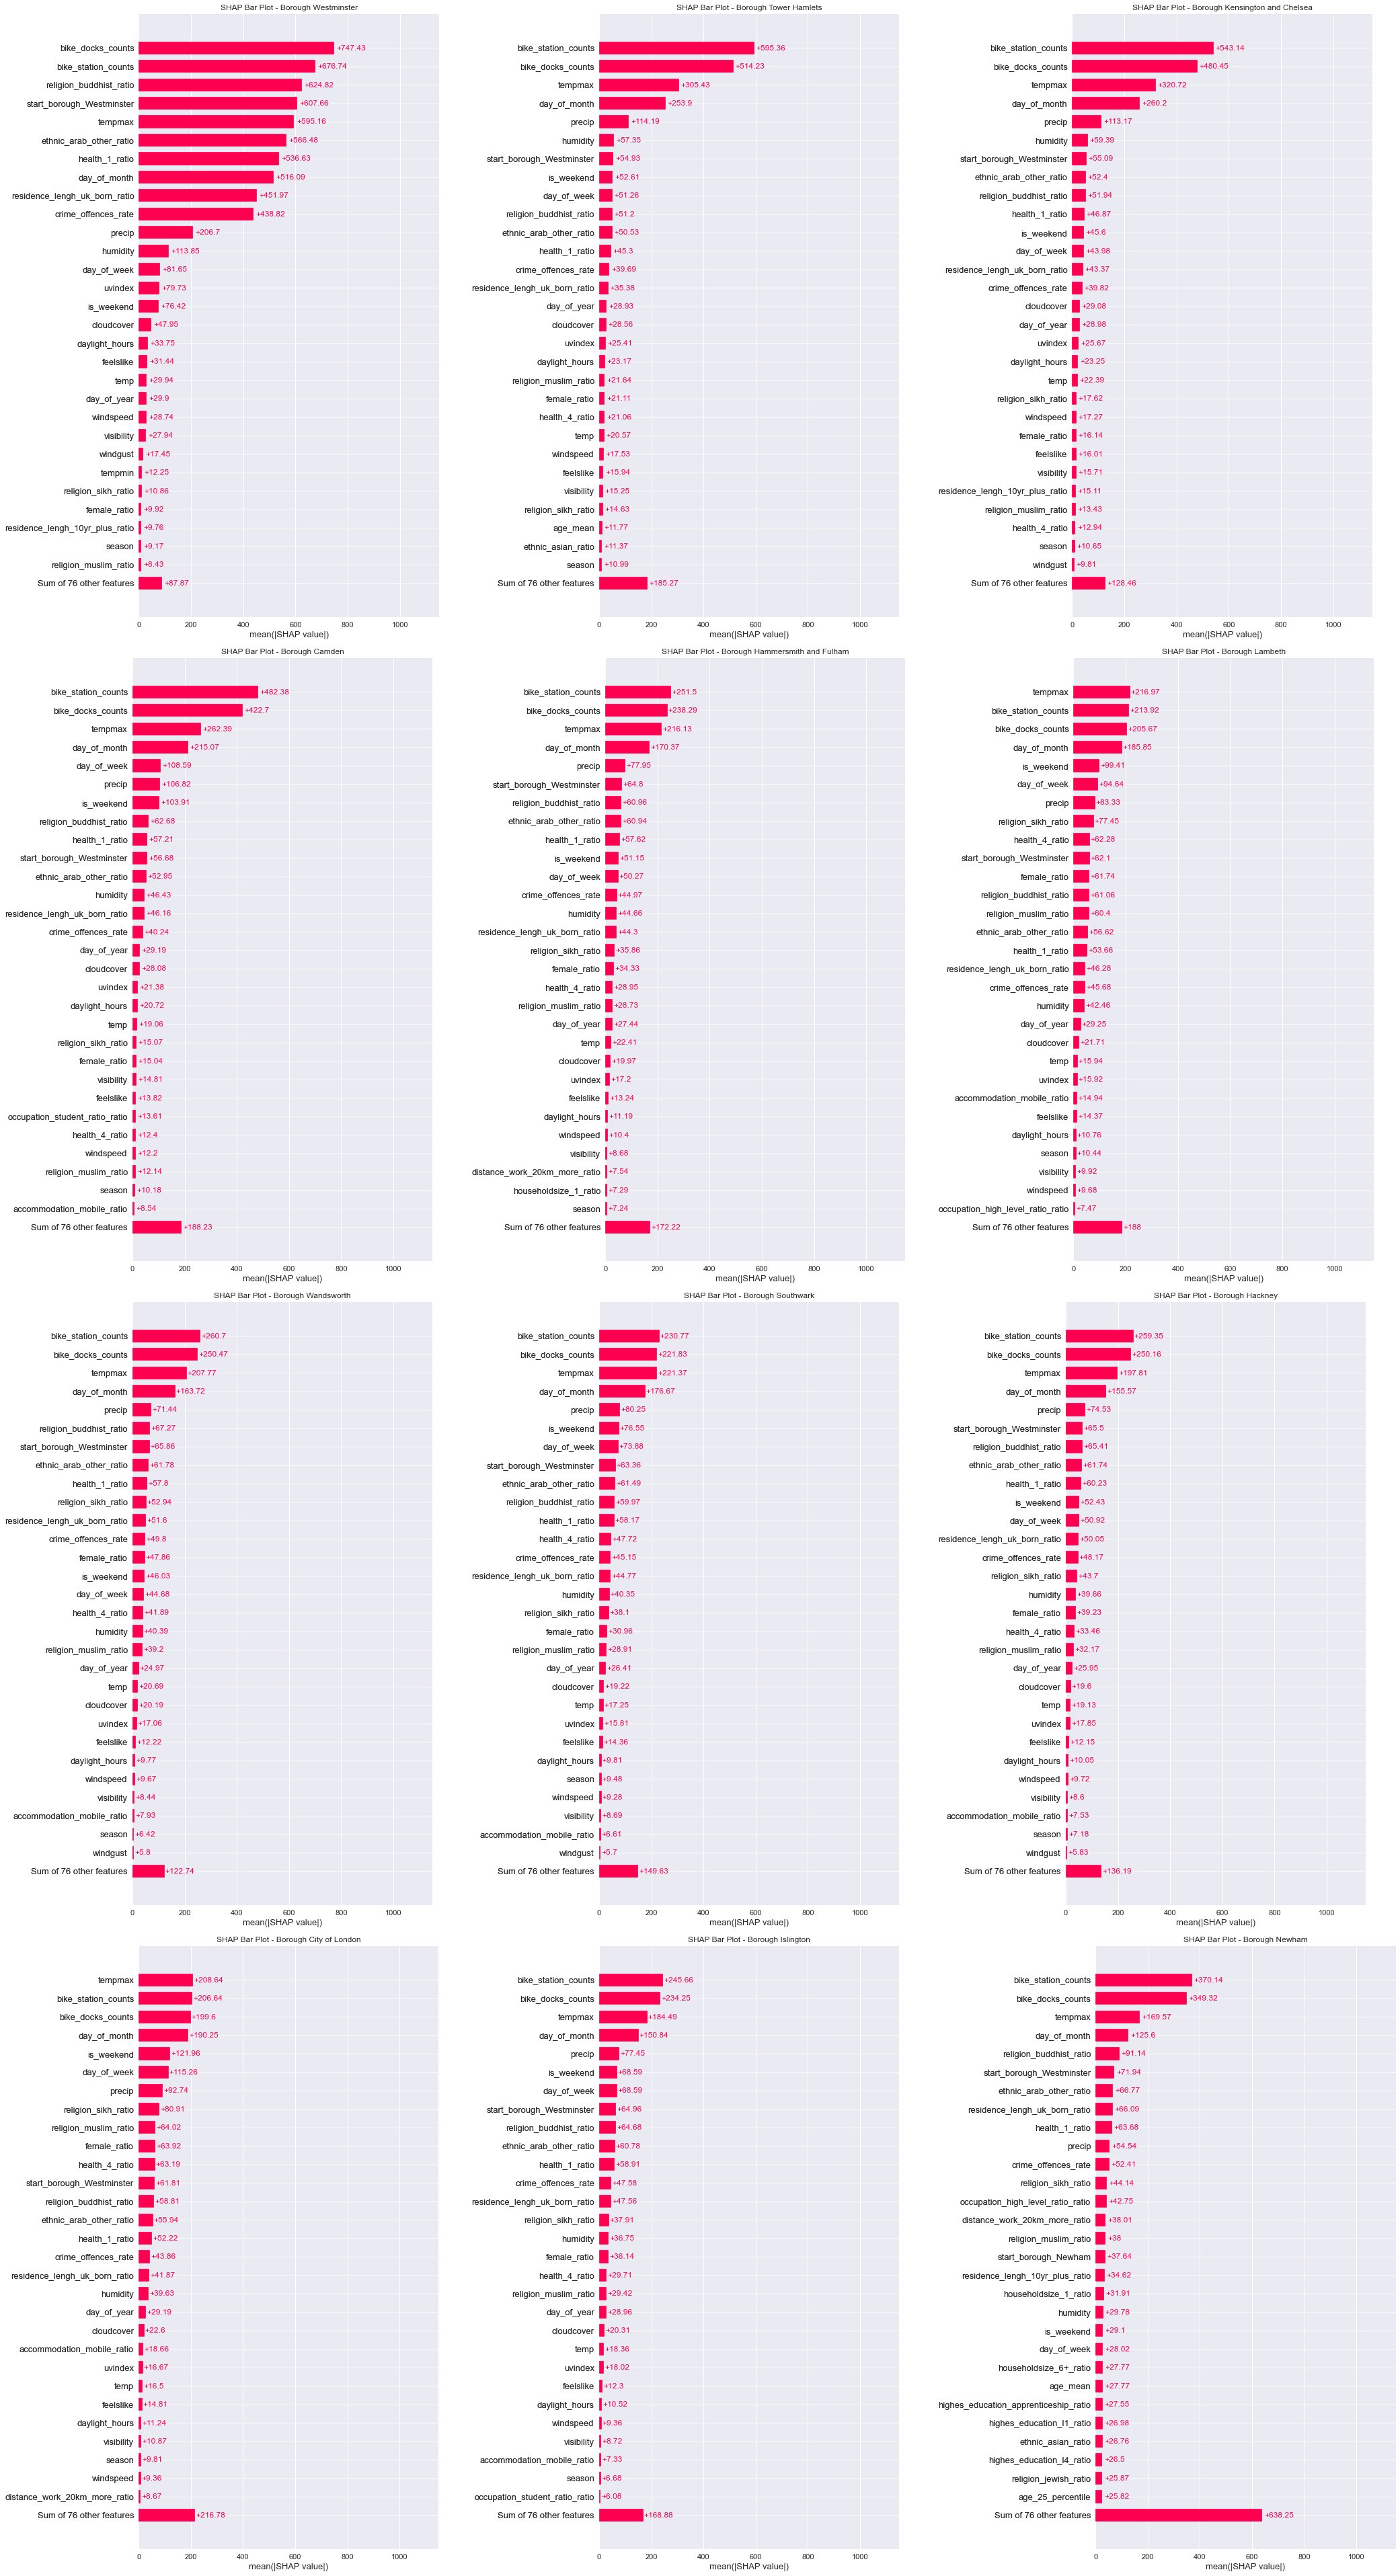

<Figure size 576x1188 with 0 Axes>

In [183]:
global_min = 0
global_max = 1150

filename_bar_plots = '../reports/figures/shap_bar_plots_rf/'
filename_final_boroughs = '../reports/figures/shap_bar_plots_rf/combined_borough_shap_plots.png'

model_interpret.plot_boroughs_bar(shap_values_rf, x_daily_test, boroughs, global_min, global_max, filename_bar_plots, filename_final_boroughs)

#### 1.4.2 Gradient Boosting

In [184]:
filename_expl = '../models/shap_explainer_gb.sav'
filename_val = '../models/shap_values_gb.sav'

shap_values_gb = model_interpret.create_shap(gb_daily, x_daily_test[feature_cols_daily], filename_expl, filename_val)

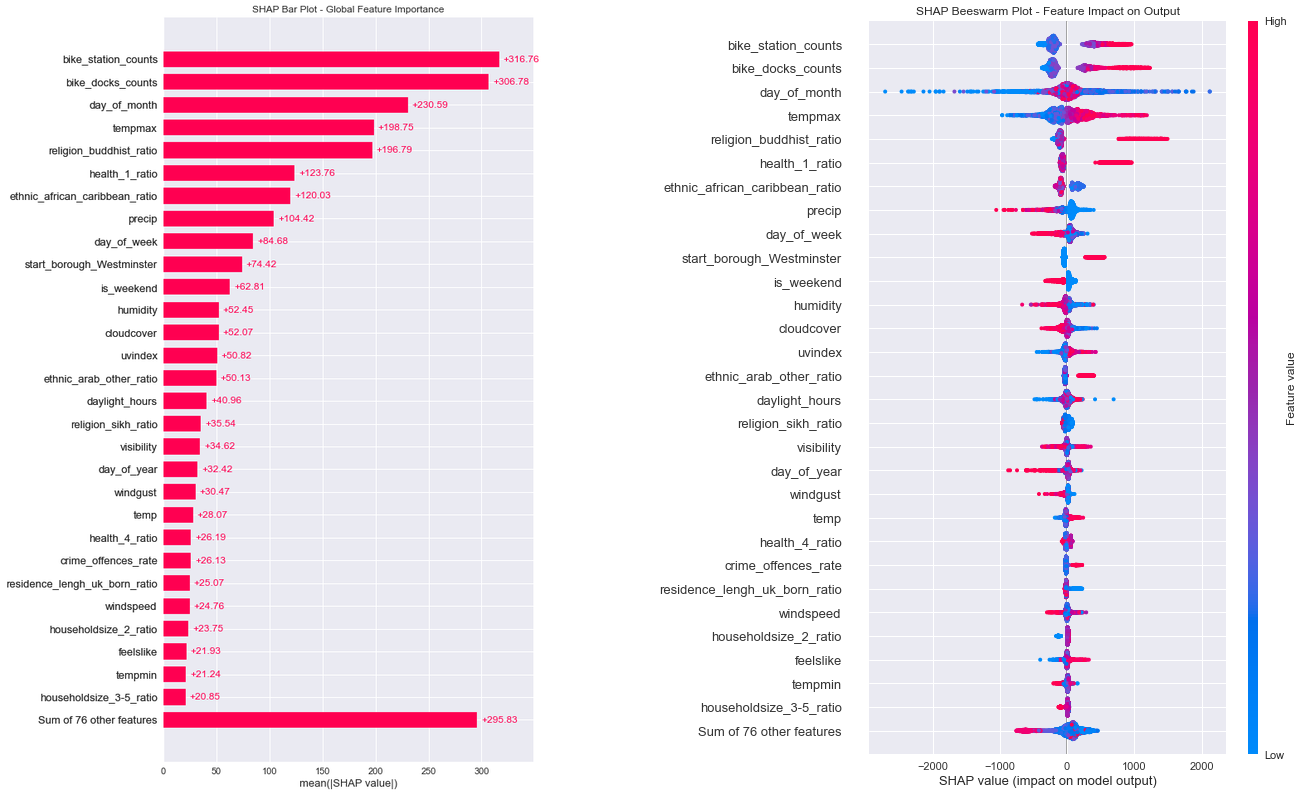

<Figure size 576x972 with 0 Axes>

In [185]:
filename_bar_plot = '../reports/figures/shap_global_plots_gb/global_bar_plot.png'
filename_beeswarm_plot = '../reports/figures/shap_global_plots_gb/global_beeswarm_plot.png'
filename_final = '../reports/figures/shap_global_plots_gb/combined_global_shap_plots.png'

model_interpret.plot_shap_bar_and_beeswarm(shap_values_gb, filename_bar_plot, filename_beeswarm_plot, filename_final)

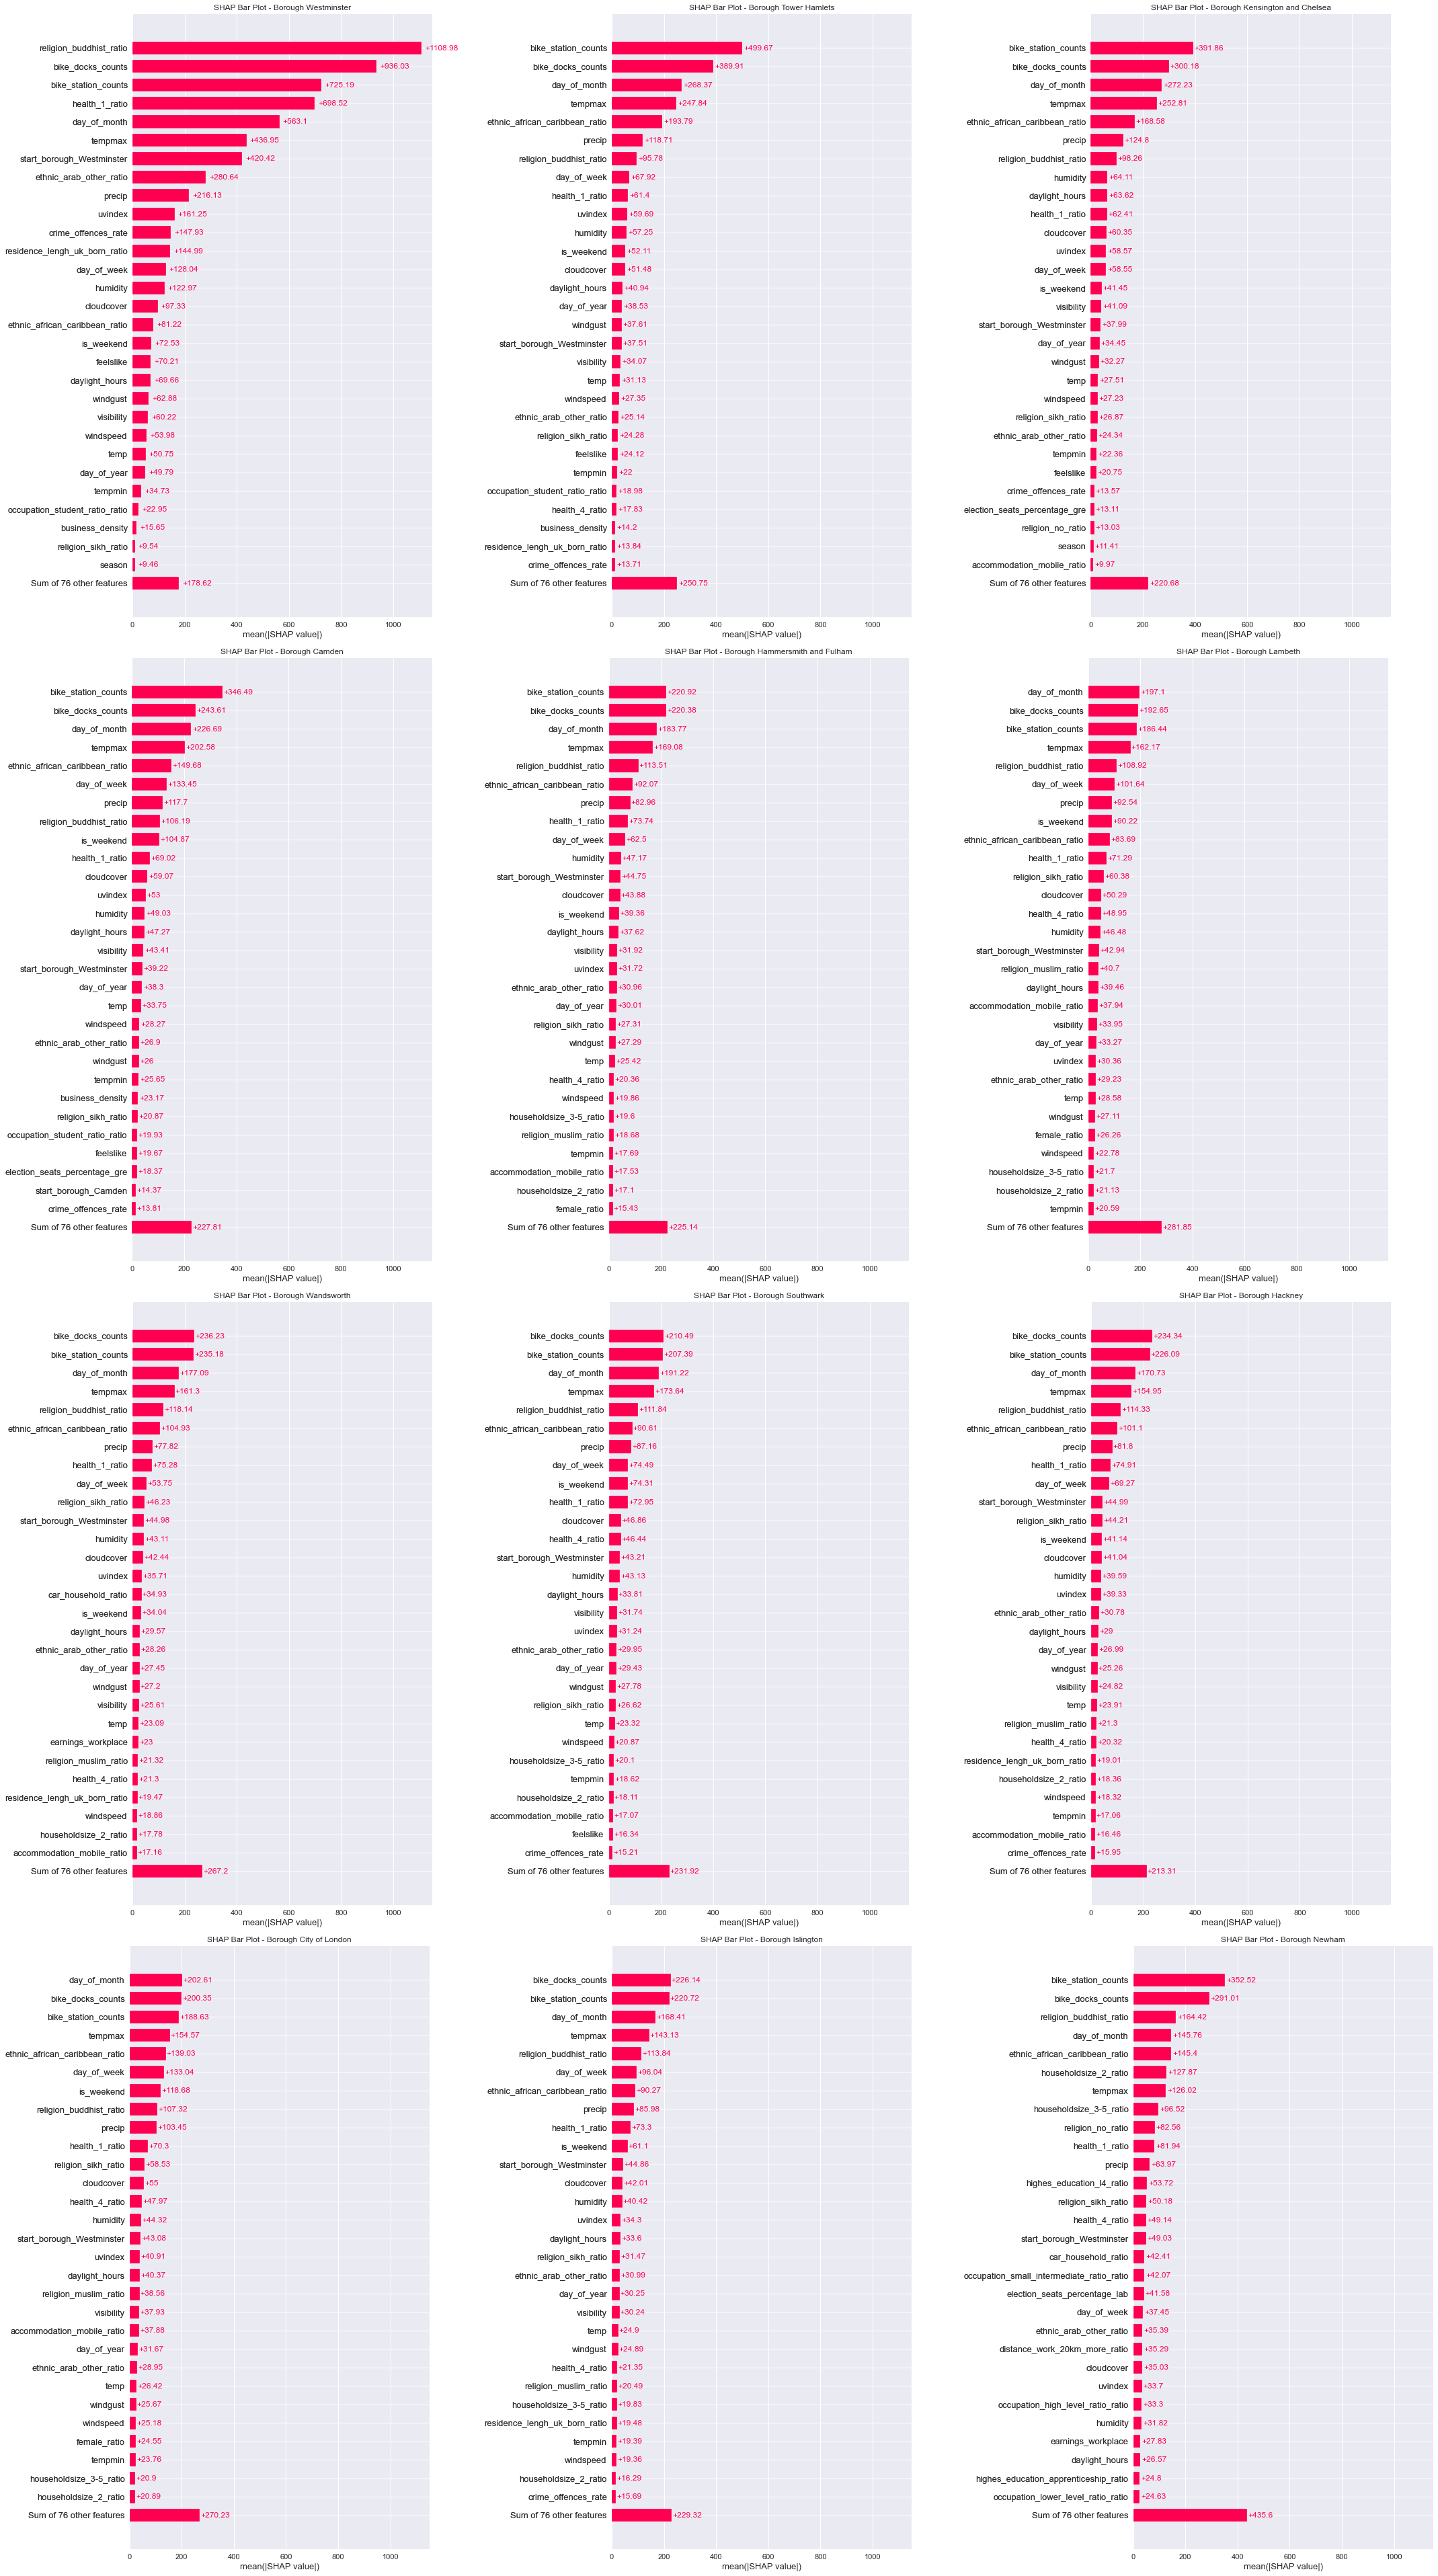

<Figure size 576x1188 with 0 Axes>

In [186]:
global_min = 0
global_max = 1150

filename_bar_plots = '../reports/figures/shap_bar_plots_gb/'
filename_final_boroughs = '../reports/figures/shap_bar_plots_gb/combined_borough_shap_plots.png'

model_interpret.plot_boroughs_bar(shap_values_gb, x_daily_test, boroughs, global_min, global_max, filename_bar_plots, filename_final_boroughs)

# 3. Interpretability: Deep Learning

### Data & Model Loading: Deep Learning

### Shapley Additive Explanations (SHAP)

In [ ]:
# load data

journey_hourly_16 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_hourly_2016.csv', parse_dates=['start_date'], index_col=0)
journey_hourly_17 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_hourly_2017.csv', parse_dates=['start_date'], index_col=0)
journey_hourly_18 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_hourly_2018.csv', parse_dates=['start_date'], index_col=0)
journey_hourly_19 = pd.read_csv('../data/processed/aggregated_journey_data/agg_journey_data_hourly_2019.csv', parse_dates=['start_date'], index_col=0)

# use 2016, 2017 and 2018 as train data and 2019 as test data
journey_train_orig = pd.concat([journey_hourly_16, journey_hourly_17, journey_hourly_18])
journey_test_orig = journey_hourly_19.copy()

# remove start_data and demand column 
journey_train = journey_train_orig.drop(columns=['start_date', 'demand'])
journey_test = journey_test_orig.drop(columns=['start_date', 'demand'])

# min max scaling: the scaler is fit on the training data and then used to transform both the training and test data. The target variable demand is not scaled.
journey_train_scaled, journey_test_scaled = dl_models.min_max_scaling(journey_train, journey_test, journey_train_orig, journey_test_orig)

# arrange data to 3D tensor with shape [batch, timesteps, feature] and split to train and test.
lookback = 96
X_train, Y_train, X_test, Y_test = dl_models.create_train_test_data(journey_train_scaled, journey_test_scaled, lookback, boroughs)

# add positional encoding
X_train = dl_models.add_positional_encoding(X_train)
X_test = dl_models.add_positional_encoding(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

In [ ]:
#load model
transformer_model = joblib.load('../models/transformer_model.h5')

#pred
transformer_pred = transformer_model.predict(X_test)

In [ ]:
# permutation test

from sklearn.metrics import mean_absolute_error

def calculate_permutation_importances(model, X_test, Y_test):
    """
    This function calculates the permutation importance for each feature in the data.

    Args:
    model : The trained model.
    X_test : Array containing the input sequences for the testing data.
    Y_test : Array containing the output sequences for the testing data.

    Returns:
    perm_importances : List of tuples, each containing the feature index and its permutation importance, sorted in descending order by the permutation importance.
    """
    
    perm_importances = []
    
    for feature_index in range(X_test.shape[-1]):
        importance = permutation_test(model, X_test, Y_test, feature_index)
        perm_importances.append((feature_index, importance))

    # sort by importance in descending order
    perm_importances.sort(key=lambda x: x[1], reverse=True)
    
    return perm_importances



In [ ]:
sorted_importances = calculate_permutation_importances(transformer_model, X_test, Y_test)

for feature_index, importance in sorted_importances:
    print(f"Feature {feature_index} importance: {importance}")
